In [1]:
from src.models.NBC import NBC
from src.models.NBC_TI import NBC_TI
from src.AnalysisHelper import plot_results, confusion_matricies_table, measures
from config import results_path, data_path, data_url, reference_methods_group
import clustbench
import numpy as np
import os

In [2]:
# More datasets: https://clustering-benchmarks.gagolewski.com/weave/data-v1.html#
battery = "other"
dataset = "chameleon_t8_8k"
methods = ["NBC_TI (TODO)", "NBC", "sklearn_kmeans"]

## Loading benchmark dataset

In [3]:
# Workaround to download data to desired folder
os.chdir(data_path)
benchmark = clustbench.load_dataset(battery, dataset, url=data_url)
os.chdir("..")

# Reference partition of dataset assigned by experts
reference = benchmark.labels[0]
permute = np.array([7, 4, 5, 3, 6, 8, 2, 1])
reference = permute[reference - 1]

## Fetching precomputed clustering results

In [4]:
results = clustbench.load_results(
    reference_methods_group, benchmark.battery, benchmark.dataset, benchmark.n_clusters, path=results_path)
results.keys()

dict_keys(['sklearn_kmeans'])

## NBC clusterization

In [5]:
%%time
model = NBC(k=40)
results["NBC"] = clustbench.fit_predict_many(model, benchmark.data, benchmark.n_clusters)

CPU times: total: 578 ms
Wall time: 330 ms


## NBC-TI clusterization

In [6]:
%%time
model = NBC_TI()
results["NBC_TI (TODO)"] = clustbench.fit_predict_many(model, benchmark.data, benchmark.n_clusters)
results.keys()

CPU times: total: 625 ms
Wall time: 254 ms


dict_keys(['sklearn_kmeans', 'NBC', 'NBC_TI (TODO)'])

## Comparison

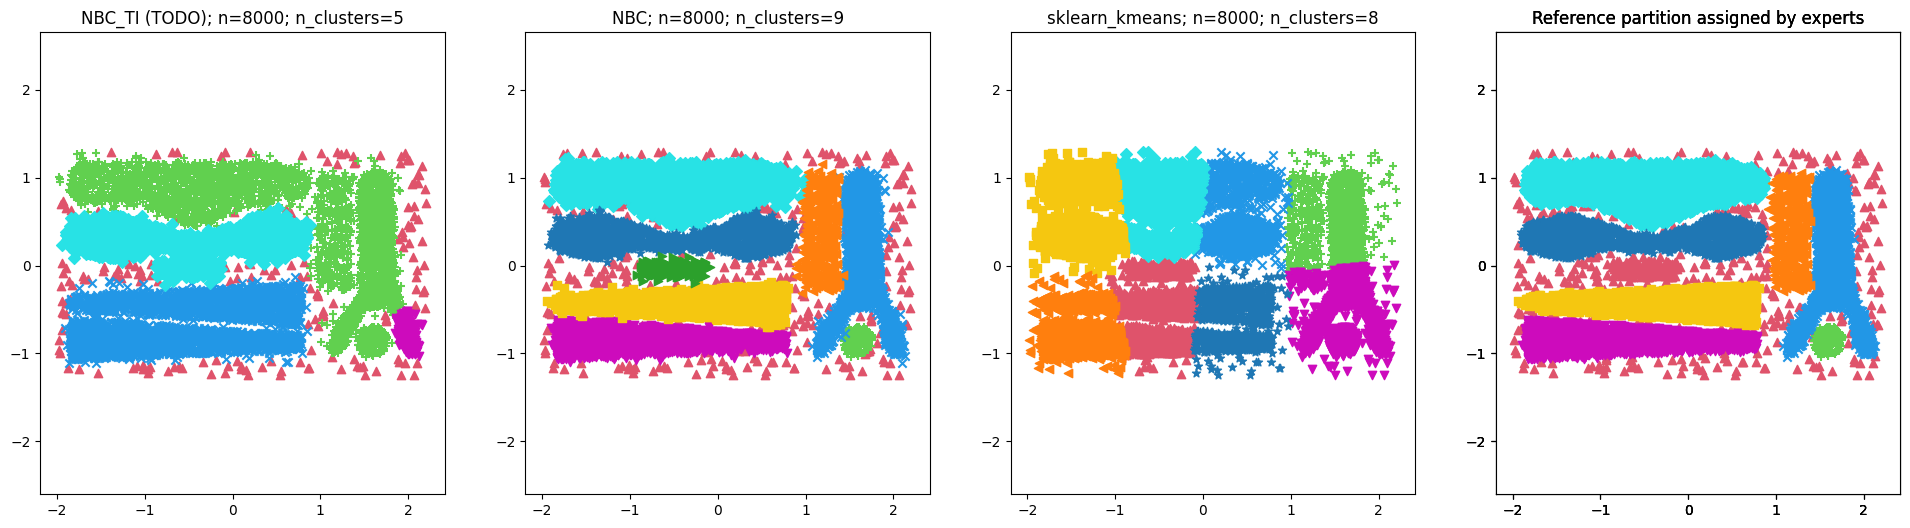

In [7]:
plot_results(benchmark.data, methods, results, reference)

In [8]:
confusion_matricies_table(methods, results, reference)

╒══════════════════════════════╤══════════════════════════════════════════════════╤═════════════════════════════════════╕
│ NBC_TI (TODO) k=8:           │ NBC k=8:                                         │ sklearn_kmeans k=8:                 │
│ [[ 169   72   60  213    7]  │ [[ 237    0   17   19   17   18   24    7  182]  │ [[200  50  42  13  52  56  52  56]  │
│  [   0  181    0    0    0]  │  [   8  172    1    0    0    0    0    0    0]  │  [  0   0   0   0 181   0   0   0]  │
│  [   2 1214    0    0  167]  │  [   1    0 1381    0    0    0    0    1    0]  │  [  0 692   0   0 691   0   0   0]  │
│  [   2 1449    0    0    0]  │  [   4    0    0 1447    0    0    0    0    0]  │  [  0   0 411 661   0 379   0   0]  │
│  [   0    0 1450    0    0]  │  [   9    0    0    0 1441    0    0    0    0]  │  [418   0   0   0   0   0 341 691]  │
│  [   4    0 1106    0    0]  │  [   4    0    0    0    0 1106    0    0    0]  │  [391   0   0   0   0   0 495 224]  │
│  [   0    0    0 1554 

In [9]:
measures(methods, results, reference)

╒═══════════════╤═════╤════════════════╕
│ NBC_TI (TODO) │ NBC │ sklearn_kmeans │
╘═══════════════╧═════╧════════════════╛
